# Mutation

To test:

- if no sprays, no host, severity stays constant
- if mutation scale is basically 0 for host or fung, and no spray/host, dists stay the same

so set `host_effect, fung_effect = np.ones`.

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

In [42]:
import copy

import numpy as np

import plotly.graph_objects as go
from plotly.subplots import make_subplots

import pandas as pd

import matplotlib.pyplot as plt



from polymodel.config import Config

from polymodel.utils import (
    initial_point_distribution,
    get_dist_mean,
)

from polymodel.simulator import SimulatorOneTrait, SimulatorBothTraits

from polymodel.consts import (
    DEFAULT_I0,
    DEFAULT_BETA,
    MUTATION_PROP,
    FUNG_MUTATION_SCALE,
    HOST_MUTATION_SCALE,
    DEFAULT_P
)

from polymodel.run import no_joblib_simulations_run

from polymodel.params import PARAMS

from polymodel.utils import (
    host_growth_function,
    edge_values,
    get_dispersal_kernel,
    trait_vec,
)

from plots.fns import standard_layout

In [43]:
kv = trait_vec(5)

In [47]:
M = get_dispersal_kernel(kv, 0.1, 0.01)
M

array([[9.84134475e-01, 1.58655254e-02, 1.34989803e-04, 2.86651572e-08,
        1.27981254e-13],
       [1.57305356e-02, 9.68268949e-01, 1.57305356e-02, 1.34961138e-04,
        2.86650292e-08],
       [1.34961138e-04, 1.57305356e-02, 9.68268949e-01, 1.57305356e-02,
        1.34961138e-04],
       [2.86650292e-08, 1.34961138e-04, 1.57305356e-02, 9.68268949e-01,
        1.57305356e-02],
       [1.27986510e-13, 2.86651572e-08, 1.34989803e-04, 1.58655254e-02,
        9.84134475e-01]])

In [49]:
beta = np.arange(1,6)

In [50]:
b1 = beta * np.identity(5)

In [ ]:
np.matmul(M, b1) - np.matmul(b1, M)

array([[ 0.00000000e+00,  1.58655254e-02,  2.69979606e-04,
         8.59954716e-08,  5.11925018e-13],
       [-1.57305356e-02,  0.00000000e+00,  1.57305356e-02,
         2.69922276e-04,  8.59950876e-08],
       [-2.69922276e-04, -1.57305356e-02,  0.00000000e+00,
         1.57305356e-02,  2.69922276e-04],
       [-8.59950876e-08, -2.69922276e-04, -1.57305356e-02,
         0.00000000e+00,  1.57305356e-02],
       [-5.11946041e-13, -8.59954716e-08, -2.69979606e-04,
        -1.58655254e-02,  0.00000000e+00]])

# Single trait

## Mutation occurs even without sprays etc

In [100]:
c2 = Config(
    type='single',
    verbose=False,
)

c2.mutation_proportion=0.01
c2.mutation_scale_fung=1e-5

data2 = SimulatorOneTrait(
    c2,
    fungicide_on=True,
    host_plant_on=False,
    number_of_sprays=0,
).run_model([DEFAULT_I0]*5, [DEFAULT_BETA]*5)

In [88]:
c3 = copy.deepcopy(c2)

c3.mutation_scale_fung = 1e-6

data3 = SimulatorOneTrait(
    c3,
    fungicide_on=True,
    host_plant_on=False,
    number_of_sprays=0,
).run_model([DEFAULT_I0]*5, [DEFAULT_BETA]*5)

new


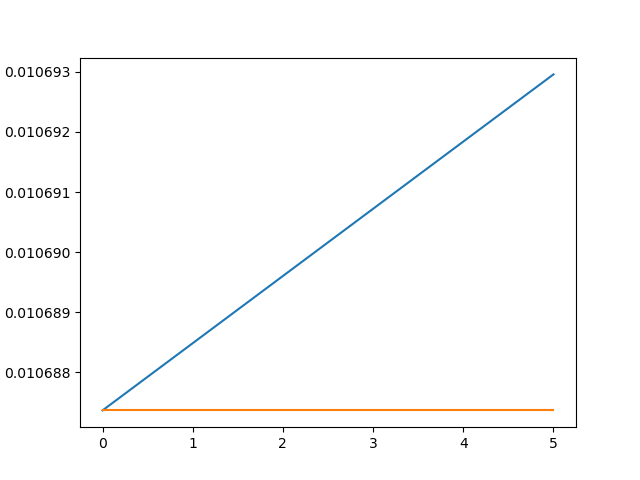

In [102]:
f, ax = plt.subplots()

ax.plot(data2['fung_means'])
ax.plot(data3['fung_means'])

print('new')

## Severity constant given no spray, no host

In [95]:
c = Config(
    type='single',
    verbose=False,
)

data_const = SimulatorOneTrait(
    c,
    fungicide_on=True,
    host_plant_on=False,
    number_of_sprays=1,
).run_model([DEFAULT_I0]*5, [DEFAULT_BETA]*5)

C:\Users\user\AppData\Local\Temp/ipykernel_10664/1479234262.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, ax = plt.subplots()


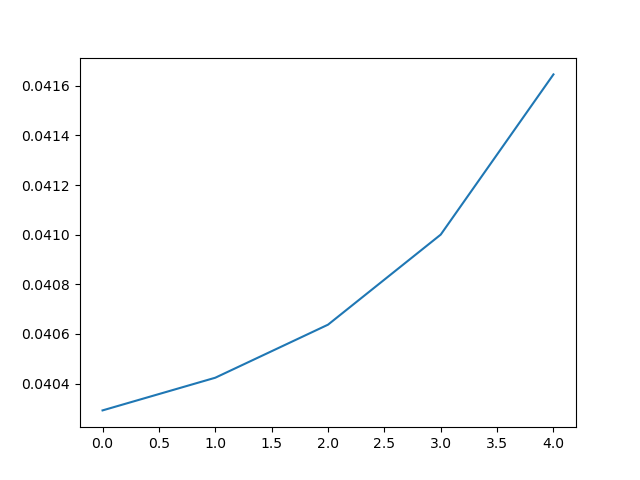

In [96]:
f, ax = plt.subplots()

ax.plot(data_const['dis_sev'])

## Host on

If we replace host effect with `np.ones` then it works - constant severity and slightly decreasing dist mean

In [113]:
ch = Config(
    type='single',
    verbose=False,
)

data_host = SimulatorOneTrait(
    ch,
    fungicide_on=False,
    host_plant_on=True,
    # number_of_sprays=1,
).run_model([DEFAULT_I0]*5, [DEFAULT_BETA]*5)

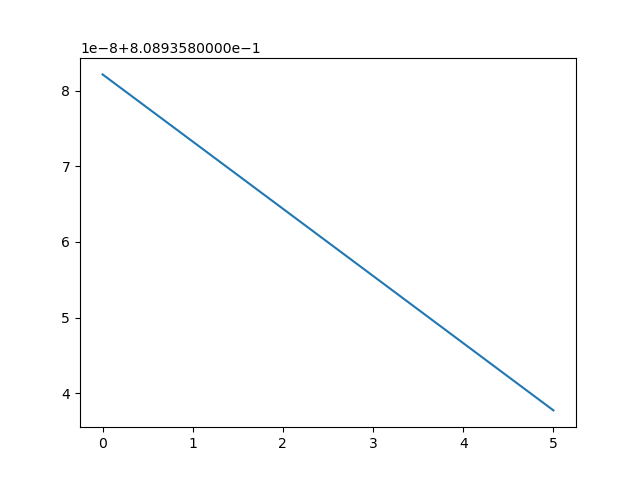

In [115]:
f, ax = plt.subplots()

ax.plot(data_host['host_means'])
# ax.plot(data_host['dis_sev'])

# Both traits

In [201]:
N_Y = 3

In [325]:
cb = Config(
    type='single',
    verbose=False,
    n_k=500,
    n_l=20,
)

cb.mutation_proportion = 0.1

data_both = SimulatorBothTraits(
    cb,
    number_of_sprays=1
).run_model([DEFAULT_I0]*N_Y, [DEFAULT_BETA]*N_Y)

In [323]:
data_one= SimulatorOneTrait(
    cb,
    fungicide_on=True,
    host_plant_on=False,
    number_of_sprays=1,
).run_model([DEFAULT_I0]*N_Y, [DEFAULT_BETA]*N_Y)

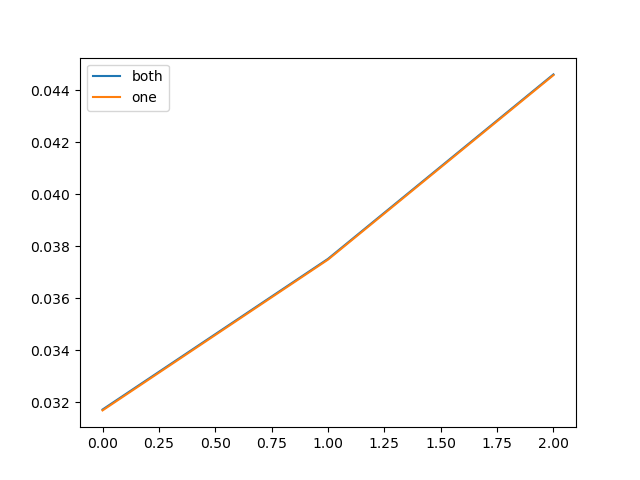

In [326]:
f, ax = plt.subplots()

ax.plot(data_both['dis_sev'], label='both')
ax.plot(data_one['dis_sev'], label='one')

ax.legend()

In [314]:
data_one['dis_sev']

array([0.03168947, 0.03749164, 0.04459002])

In [315]:
data_both['dis_sev']

array([0.0317227 , 0.03752069, 0.0446178 ])

In [327]:
data_both['dis_sev']

array([0.0317227 , 0.03752069, 0.0446178 ])

In [316]:
np.amax(np.abs(data_one['dis_sev'] - data_both['dis_sev']))

3.322916420291783e-05

## Convergence - seems close but not perfect?

With mutation prop = 0, get:

At 100, 100:
Severity one trait, two, difference = :
- 0.03617818
- 0.03620773
- 3.259461288833421e-05

At 300,300:
- 0.0316356 
- 0.03166375
- 3.125634045540726e-05

At 1000,20:
- 0.02853592
- `fung_means=0.00219069`

### Old method

At 100,100: old method:
- 0.03620773
- `fung_means = 0.00600085`

At 300,300: old method:
<!-- - 0.03166375 -->
- `fung_means = 0.00308024`

At 1000,20: old method:
- 0.02853592
- `fung_means = 0.00219069`

So I guess at the very least use same `n` for both. Probably is the source of the issue. Try with massive `n`?

In [293]:
data_both['fung_means']

array([0.00219069, 0.00343117, 0.00583913, 0.010606  ])